<a/ id='top'></a>

# CSCI4022 Homework 6; Directed Graphs
## Due Friday, April 7 at 11:59 pm to Canvas and Gradescope

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Practice: PageRank; 25 pts)


The file `transfer_list.csv` contains a log of transfers of players between European footbal clubs.  Load it into memory and take a look at the columns.

Of particular importance to us are to think of the transfers of players as a **directed graph**, where the team purchasing the player in `Team_to` is spending money (in `Transfer_fee`) to gain the use of the player in each row.  If we were to run PageRank on this graph, it would give us a picture of which teams are importing the most talent!

In [2]:
df=pd.read_csv('../data/transfer_list.csv')
df.head(20)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,NaN,26000000
6,Flávio Conceicao,Central Midfield,26,Dep. La Coruña,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,25000000
7,Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,NaN,25000000
8,David Trézéguet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,NaN,23240000
9,Claudio López,Centre-Forward,25,Valencia CF,LaLiga,Lazio,Serie A,2000-2001,NaN,23000000


**Part A:** Process and explore the data.

The data should contain transfers to and from the 5 major European leagues: the Bundesliga in Germany, La Liga in Spain, Ligue 1 in France, Serie A in Italy, and the Premeir League in England.  Verify that these are the only leagues present in either the `League_from` or `League_to` columns.  If not, fix any descrepencies in the data or drop any rows involving other leagues.

You may use `re` or `string` methods if you desire.



In [3]:
l_f = df['League_from'].to_list()
l_t = df['League_to'].to_list()
leagues = l_f+l_t
print(np.unique(leagues))

['1.Bundesliga' 'LaLiga' 'Ligue 1' 'Premier League' 'Serie A' 'Série A']


In [4]:
clean_df = df.copy(deep=False)
clean_df.loc[clean_df["League_to"] == "Série A", "League_to"] = "Serie A"
clean_df.loc[clean_df["League_from"] == "Série A", "League_from"] = "Serie A"
clean_df.loc[clean_df["League_to"] == "1.Bundesliga", "League_to"] = "Bundesliga"
clean_df.loc[clean_df["League_from"] == "1.Bundesliga", "League_from"] = "Bundesliga"

l_f = clean_df['League_from'].to_list()
l_t = clean_df['League_to'].to_list()
leagues = l_f+l_t
print(np.unique(leagues))

['Bundesliga' 'LaLiga' 'Ligue 1' 'Premier League' 'Serie A']


**Part B:** Create a column-stochasitc transfer matrix where the presence of *any* transfer from team $A$ to $B$ is treated as the existence of an outlink from $A$ to $B$.  Describe both the matrices dimensions and sparsity: what proportion of its entries are 0?

In [5]:
teams = np.unique(clean_df["Team_from"].to_list() + clean_df["Team_to"].to_list())
t_f = clean_df['Team_from'].to_list()
t_t = clean_df['Team_to'].to_list()
# print(teams)
transfers = pd.DataFrame(columns = teams, index=teams) # this is going to define the number of out links
for col in transfers.columns:
    transfers[col].values[:] = 0
t=[]
for i in range(len(teams)):
    t.append((t_f[i], t_t[i]))
for x in t:
    transfers[x[0]][x[1]] +=1
transfers_raw = transfers.copy(deep=True)
for c in transfers.columns:
    s = transfers[c].sum()
    if(s==0):
        s=1
    for i in transfers.index:
        transfers[c][i] = transfers[c][i] / s
transfers.head()
# iterate through data frame and sum number of entries that ~=0
zeros = 0
for c in transfers.columns:
    for i in transfers.index:
        if(transfers[c][i] < 0.00001):
            zeros+=1
print("Dims:", len(transfers.columns), "X", len(transfers.columns))
print("Entries:", len(transfers.columns)*len(transfers.columns))
print("Zeros:",zeros)
print("Proportion:", zeros/(len(transfers.columns)*len(transfers.columns)))

Dims: 181 X 181
Entries: 32761
Zeros: 32596
Proportion: 0.9949635237019627


There are 181 teams listed in the data set making for a 181 by 181 matrix with 32761 entries. Of those entries the outlinks is very small. 0.99496 of the entries are 0 meaning that 32596 of the possible 32761 combinations of teams did not occur.

**Part C:** Make a transfer dictionary or list, since the matrix is pretty sparse!  Follow the general conventions used in the in-class notebooks for **sparse** page rank.

In [6]:
sparse = pd.DataFrame(index=transfers.columns, columns=["Degree", "Destinations"])
# print(transfers_raw.loc["1. FC Köln"])
# print(transfers_raw.loc["1. FC Köln"]["1.FC K'lautern"])
for i in sparse.index:
    sparse.loc[i]["Degree"] = 0
    sparse.loc[i]["Destinations"] = []
sparse.head()
for x in range(len(t_f)):
    sparse.loc[t_f[x]]["Degree"]+=1
    sparse.loc[t_f[x]]["Destinations"].append(t_t[x])
# sparse.loc["1. FC Köln"]["Degree"] = 4

In [7]:
sparse.head()

,Degree,Destinations
1. FC Köln,3,"[Bay. Leverkusen, Spurs, VfL Wolfsburg]"
1.FC K'lautern,4,"[Bayern Munich , 1. FC Köln, Werder Bremen, Ha..."
1.FC Nuremberg,5,"[Blackburn, Bay. Leverkusen, Bor. Dortmund, Ba..."
1.FSV Mainz 05,11,"[Bay. Leverkusen, FC Schalke 04, FC Schalke 04..."
1860 Munich,2,"[Bay. Leverkusen, VfL Wolfsburg]"


**Part D:** Run sparse PageRank using your object in $c$.  Report the top 20 clubs for receiving transfers by their PageRanks.

After that, take a look at the 2000-2018 finals of the UEFA Champions League (UCL), [here](https://en.wikipedia.org/wiki/List_of_European_Cup_and_UEFA_Champions_League_finals).  Does it appear that receiving lots of transfers is helping with being competitive in the largest of European competitions?

In [8]:
# beta = 0.85
# Nmat = np.ones((n,n))/n
# A1 = beta*M1 + (1-beta)*Nmat

# # initial rank vector guess
# r_old = np.repeat(1/n, n)

# # power iteration for M1
# for _ in range(20):
#     r_new = np.matmul(A1, r_old)
#     r_old = r_new
    
# print("Rank vector for G1: ", np.round(r_new, 4))
beta = 0.85
n = len(sparse.index)
r_old = {}
for x in sparse.index:
    r_old[x] = 1/n
r_new = {}
for i in sparse.index:
    r_new[i]=(1-beta)/n
# print(r_new)
for page in sparse.index:
    for team in sparse.loc[page]["Destinations"]:
        r_new[team] = r_new[page] + beta*r_old[page]/sparse.loc[page]["Degree"]
# print(sorted(r_new))
# print(r_new)
# print()
s = sorted(r_new.items(), key=lambda x:x[1],reverse=True)
for i in range(20):
    print(s[i])

('Stoke City', 0.00934255406406383)
('Villarreal CF', 0.00934255406406383)
('1.FSV Mainz 05', 0.00843437304658663)
('Arsenal', 0.00843437304658663)
('Bayern Munich ', 0.00843437304658663)
('Bor. Dortmund', 0.00843437304658663)
("Bor. M'gladbach", 0.00843437304658663)
('Corinthians', 0.00843437304658663)
('FC Schalke 04', 0.00843437304658663)
('G. Bordeaux', 0.00843437304658663)
('Juventus', 0.00843437304658663)
('Palmeiras', 0.00843437304658663)
('Real Madrid', 0.00843437304658663)
('Saint-Étienne', 0.00843437304658663)
('VfL Wolfsburg', 0.00843437304658663)
('Crystal Palace', 0.008257971059591323)
('Fiorentina', 0.008257971059591323)
('Hull City', 0.008257971059591323)
('Leeds', 0.008257971059591323)
('Liverpool', 0.008257971059591323)


The teams who were in the 2010-2018 finals are Barcelona, Manchester United, Chelsea, Bayern Munich, Borussia Dortmund, Real Madrid, Atleic Madrid, Juventus, Liverpool, and Tottenham. Of these almost all appear on the list of 20 teams but the top four teams never were in the UCL finals leading it to be a relatively weak link between number of trades and UCL final appearence.

**Part E:** Try *weighted* page rank on a matrix.

Create a column-stochastic matrix where each entry is the proportion of  `Transfer_fee` dollars sold by that team (in the column).  A team with outgoing transfers of 5 and a transfer of 10 would have a (1/3) and a (2/3) in that column, for example.

Then re-run pagerank again, this time using the standard `matmul` approach instead of a sparse implementation.  Who are the biggest buyers?  Does it correlate better with UCL success?

In [11]:
fee = clean_df['Transfer_fee'].to_list()
transfers = pd.DataFrame(columns = teams, index=teams) # this is going to define the number of out links
for col in transfers.columns:
    transfers[col].values[:] = 0
t=[]
total_spent={}
for i in range(len(teams)):
    t.append((t_f[i], t_t[i], fee[i]))
    total_spent[t_f[i]]=0
for x in t:
    total_spent[x[0]] += x[2]
for x in t:
    transfers[x[0]][x[1]] +=x[2]/total_spent[x[0]]
for c in transfers.columns:
    s = transfers[c].sum()
    if(s==0):
        s=1
    for i in transfers.index:
        transfers[c][i] = transfers[c][i] / s
print(transfers["FC Barcelona"].to_list())

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2226027397260274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023972602739726026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0684931506849315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.684931506849315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
M = []
for j in transfers.columns:
    M.append(np.array(transfers[j].to_list()))
M=np.array(M)
n=M.shape[0]
r_old = np.repeat(1/n,n)
for _ in range(20):
    r_new=np.matmul(M,r_old)
    r_old = r_new
# print(r_new)
rank = {}
for j in range(len(transfers.columns)):
    rank[transfers.columns[j]] = r_new[j]
s = sorted(rank.items(), key=lambda x:x[1],reverse=True)
for i in range(20):
    print(s[i])

('SC Freiburg', 0.0016397278063761532)
('Alavés', 0.0016353314419778613)
('1. FC Köln', 0.0016309061329538408)
('VfL Wolfsburg', 0.0016309061329538408)
('Atalanta', 0.0016154312598798271)
("1.FC K'lautern", 0.00160563644964403)
('Montpellier', 0.0015751758896162152)
('Málaga CF', 0.0015432516640594106)
('Hellas Verona', 0.001519244079511951)
('Real Zaragoza', 0.001519244079511951)
('Piacenza', 0.0015086034567705865)
('Bor. Dortmund', 0.0014979465163014083)
('AC Milan', 0.0014964535633558132)
('Bay. Leverkusen', 0.0014907509946957657)
('AS Roma', 0.0014570415710292992)
('Fiorentina', 0.001456718321361795)
('Stade Rennais', 0.0014383448368205257)
('Troyes', 0.0014383448368205257)
('Celta de Vigo', 0.0014089293690812616)
('Parma', 0.0013892474245179088)


It does not correlate with better UCL success. I am almost certain the money in transfers is linked with an increased chance to be in the UCL finals but my data does not show it. I believe something went wrong in my code. I might have failed to correctly set up the transfer matrix. I might have been looking at trades in the reversed way although I tried that. 


***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (Theory and Practice: Directed Graphs; 20 pts) 

Suppose our graph is a chain of $n$ nodes, as shown below.  

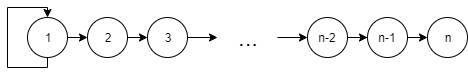

#### a) Set up a small experiment where you implement Hubs and Authorities (HITS) on a graph of this form for a *specific* value of $n$, such as $n=6$.  Run the algorithm with the "max-element equals 1" normalization, and use a convergence check using the max-norm ($L_\infty$) and a tolerance of $10^{-6}$.  Print the final Hubs and Authorities scores and how many iterations were run until convergence.

In [13]:
def dist_L2(x,y):
    return np.sqrt(np.sum((x-y)**2))

def HITS(n, k=300, tol=10**(-6)):
    L=np.zeros(n)
    for i in range(n-1):
        L=np.append(L,np.zeros(n))
    L=np.resize(L,(n,n))
    L[0][0]=1
    L[0][1]=1
    ite=2
    for i in range(1,n-1):
        L[i][ite]=1
        ite+=1
#     print(L)
    LT=np.transpose(L)
    n=L.shape[0]
    
    hub=np.ones(n)
    aut=np.ones(n)
    hub_old=np.zeros(n)
    aut_old=np.zeros(n)
    
    max_change = np.max([dist_L2(hub,hub_old), dist_L2(aut,aut_old)])
    iterations=0
    while(max_change>tol and iterations<k):
        aut_old=aut
        hub_old=hub
        aut=np.matmul(LT, hub)
        aut=aut/np.max(aut)
        hub=np.matmul(L,aut)
        hub=hub/np.max(hub)
        max_change = np.max([dist_L2(hub,hub_old), dist_L2(aut,aut_old)])
        iterations+=1
    print("Authority Score:", aut, "Hub Score:", hub, "Iterations:", iterations)

In [14]:
HITS(n=3)
print()
HITS(n=6)
print()
HITS(n=10)

Authority Score: [1.00000000e+00 1.00000000e+00 9.53674316e-07] Hub Score: [1.00000000e+00 4.76837158e-07 0.00000000e+00] Iterations: 21

Authority Score: [1.00000000e+00 1.00000000e+00 4.76837158e-07 4.76837158e-07
 4.76837158e-07 4.76837158e-07] Hub Score: [1.00000000e+00 2.38418579e-07 2.38418579e-07 2.38418579e-07
 2.38418579e-07 0.00000000e+00] Iterations: 22

Authority Score: [1.00000000e+00 1.00000000e+00 2.38418579e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07 2.38418579e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07] Hub Score: [1.0000000e+00 1.1920929e-07 1.1920929e-07 1.1920929e-07 1.1920929e-07
 1.1920929e-07 1.1920929e-07 1.1920929e-07 1.1920929e-07 0.0000000e+00] Iterations: 23


#### b) Set up the system of equations that represent taking one step of the HITS algorithm.  In other words, use markdown to explicitly state what $A^{new}$ will be as a function of $H^{old}$, and $H^{new}$ as a function of $A^{old}$.   I suggest you use your code from a) to check your work!

*Note:* be **explicit**, here.  What does the *exact* value of e.g. the 4th row of $A^{new}$ depend on?  What about the 3rd row of $H^{new}$?  You may use words if you find typesetting the large matrices challenging.

$H^{new} = \sum_{i \to j} L A^{old}$

$A^{new} = \sum_{j \to i} L_{ij}^{T} H^{new}$

From this we can see the relationship between hub score and authority score. The exact value of the 4th row of $A^{new}$ depends on the 4th row of $H^{new}$. The exact value of the 3rd row of $H^{new}$ is calculated using the 2nd row of $A^{new}$.

#### c) What will be the exact values of $A^{new}_j$ and $H^{new}_j$ resulting from the $j$th pass through the HITS algorithm, after normalization?

$H^{j} = \frac{L \cdot A^{j-1}}{max(H)}$

$A^{j} = \frac{L^{T}H^{j}}{max(A)}$

#### d) Your code in a) should have converged to the thereotical result from taking the *limit* (after many iterations) of the argument you constructed in c).  *Exactly* how many steps did it take until you converged?  Is this consistent with the theoretical result in part b?

21 steps for 3, 22 for 6 and 23. I don't know if this is consistent with the theoretical result in part b!